In [83]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [84]:
iris = datasets.load_iris()

In [85]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [86]:
X = iris['data'][:, :]

In [87]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [88]:
y = (iris['target'] == 2).astype(np.int)

In [89]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [90]:
X.shape

(150, 4)

In [91]:
y.shape

(150,)

### Function

In [92]:
# Sigmoid Function

def sigmoid(x):
  p = 1 / (1 + math.exp(-x))
  p = np.minimum(p, 0.9999)
  p = np.maximum(p, 0.0001)

  return p

In [93]:
# Calculate Binary Cross-Entropy loss over the data givin selected weights and b

def cal_BCE(X, y, b, w1, w2, w3, w4):
  BCE = 0
  for i in range(len(X)):
    a = X[i][0] * w1 + X[i][1] * w2 + X[i][2] * w3 + X[i][3] * w4 + b
    sigmoid_a = sigmoid(a)
    BCE = BCE - (y[i] * np.log2(sigmoid_a) + (1 - y[i]) * np.log2(1 - sigmoid_a))
  BCE = BCE / len(X)

  return BCE

In [94]:
# Derivatives for cross entropy

def derivatives(param, y_train, X_train, sigmoid_a):
  param = param - (y_train - sigmoid_a) * X_train

  return param

In [95]:
# Iteration

def cal_loss_history(X_train, y_train, X_val, y_val, b, w1, w2, w3, w4, learning_rate, iteration):
  loss_history = []
  loss_val_history = []
  loss_val_min = math.inf # for early stopping use

  for i in range(iteration):
    b_grad = 0.0
    w1_grad = 0.0
    w2_grad = 0.0
    w3_grad = 0.0
    w4_grad = 0.0

    for k in range(len(X_train)):
      a = X_train[k][0] * w1 + X_train[k][1] * w2 + X_train[k][2] * w3 + X_train[k][3] * w4 + b
      sigmoid_a = sigmoid(a)

      # Derivatives
      b_grad = derivatives(b_grad, y_train[k], 1.0, sigmoid_a)
      w1_grad = derivatives(w1_grad, y_train[k], X_train[k][0], sigmoid_a)
      w2_grad = derivatives(w2_grad, y_train[k], X_train[k][1], sigmoid_a)
      w3_grad = derivatives(w3_grad, y_train[k], X_train[k][2], sigmoid_a)
      w4_grad = derivatives(w4_grad, y_train[k], X_train[k][3], sigmoid_a)

    b_grad /= len(X_train)
    w1_grad /= len(X_train)
    w2_grad /= len(X_train)
    w3_grad /= len(X_train)
    w4_grad /= len(X_train)

    # Update parameters
    b = b - learning_rate * b_grad
    w1 = w1 - learning_rate * w1_grad
    w2 = w2 - learning_rate * w2_grad
    w3 = w3 - learning_rate * w3_grad
    w4 = w4 - learning_rate * w4_grad

    # Calculate loss
    loss = cal_BCE(X_train, y_train, b, w1, w2, w3, w4)
    loss_history.append(loss)

    loss_val = cal_BCE(X_val, y_val, b, w1, w2, w3, w4)
    loss_val_history.append(loss_val)

    # Early Stopping
    if loss_val < loss_val_min:
      best_b = b
      best_w1 = w1
      best_w2 = w2
      best_w3 = w3
      best_w4 = w4
      loss_val_min = loss_val
      best_iter = i

  return loss_history, loss_val_history, best_b, best_w1, best_w2, best_w3, best_w4, best_iter

In [96]:
def logistic_regression(X_train, y_train, max_iter, learning_rate, X):
  # initialize the parameters
  b = -5
  w1 = 0
  w2 = 0
  w3 = 0
  w4 = 0
  
  
  # Calculate loss and update all parameters
  loss_history, loss_val_history, b, w1, w2, w3, w4, best_iter = cal_loss_history(X_train, y_train, X_val, y_val, b, w1, w2, w3, w4, learning_rate, max_iter)
  
  # Prediction
  y_predict = X[:, 0] * w1 + X[:, 1] * w2 + X[:, 2] * w3 + X[:, 3] * w4 + b
  vf = np.vectorize(sigmoid)
  y_predict = vf(y_predict)

  threshold = 0.5
  y_predict = np.where(y_predict > threshold, 1, 0)
  
  return y_predict, b, w1, w2, w3, w4, best_iter, loss_history, loss_val_history

### Hyperparameters

In [119]:
TRAIN_RATIO = 0.8
VALIDATION_RATIO = 0.1
TEST_RATIO = 0.1

MAX_ITER = 80
LEARNING_RATE = 0.01

### Pipeline

#### 1. Split Iris data into training/validation/testing with ratios 80% train, 10% val, 10% test. Report the number of samples in three datasets (training/validation/testing).

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - TRAIN_RATIO)

In [99]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=TEST_RATIO/(TEST_RATIO + VALIDATION_RATIO))

In [100]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('\nShape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)
print('\nShape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (120, 4)
Shape of y_train: (120,)

Shape of X_val: (15, 4)
Shape of y_val: (15,)

Shape of X_test: (15, 4)
Shape of y_test: (15,)


#### 2. Visualize the learning curve for “Loss VS epochs” for model training.

In [120]:
y_predict, b, w1, w2, w3, w4, best_iter, loss_history, loss_val_history = logistic_regression(X_train, y_train, MAX_ITER, LEARNING_RATE, X_val)

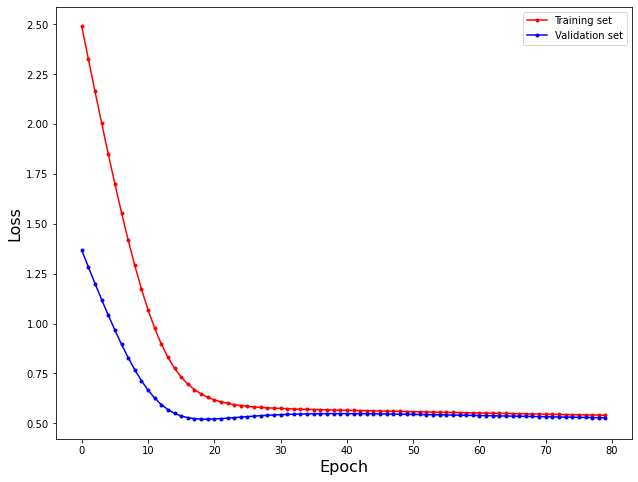

Best params at: 19


In [121]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

ax = fig.add_subplot(1, 1, 1)

ax.plot([i for i in range(len(loss_history))], loss_history, 'o-', ms=3, lw=1.5, color='red')
ax.plot([i for i in range(len(loss_val_history))], loss_val_history, 'o-', ms=3, lw=1.5, color='blue')
ax.legend(['Training set', 'Validation set'])
ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)

plt.show()

print('Best params at:', best_iter)

#### 3. Final accuracy on training, validation, and testing dataset.

a. Training data

In [122]:
y_predict, b, w1, w2, w3, w4, best_iter, loss_history, loss_val_history = logistic_regression(X_train, y_train, MAX_ITER, LEARNING_RATE, X_train)

In [123]:
accuracy_score(y_train, y_predict)

0.7333333333333333

b. Validation data

In [124]:
y_predict, b, w1, w2, w3, w4, best_iter, loss_history, loss_val_history = logistic_regression(X_train, y_train, MAX_ITER, LEARNING_RATE, X_val)

In [125]:
accuracy_score(y_val, y_predict)

0.8666666666666667

c. Testing data

In [126]:
y_predict, b, w1, w2, w3, w4, best_iter, loss_history, loss_val_history = logistic_regression(X_train, y_train, MAX_ITER, LEARNING_RATE, X_test)

In [127]:
accuracy_score(y_test, y_predict)

0.9333333333333333

#### 4. What’s the final accuracy on training, validation, and testing dataset using the classifier trained by linear_model import LogisticRegression in sklearn

In [128]:
clf = LogisticRegression()
params={"C":np.logspace(-3,3,7)}
grid_search = GridSearchCV(clf, params, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_params_['C']

clf_best = LogisticRegression(C=grid_search.best_params_['C'])
clf_best.fit(X_train, y_train)
print(clf_best.intercept_, clf_best.coef_)
print(b, w1, w2, w3, w4)

[-19.15943339] [[-1.17750268 -1.76449806  4.38639817  6.0644612 ]]
-4.947223450578077 0.35355520938024243 0.1568659504622399 0.31025377097834356 0.11738322019710545


In [129]:
clf_best.score(X_train, y_train)

0.9833333333333333

In [130]:
clf_best.score(X_val, y_val)

0.9333333333333333

In [131]:
clf_best.score(X_test, y_test)

1.0

### Function

In [113]:
# Derivatives for MSE

def mse_derivatives(param, y_train, X_train, sigmoid_a):
  param = param - (y_train - sigmoid_a) * sigmoid_a * (1 - sigmoid_a) * X_train

  return param

In [114]:
# Iteration

def mse_cal_loss_history(X_train, y_train, X_val, y_val, b, w1, w2, w3, w4, learning_rate, iteration):
  loss_history = []
  loss_val_history = []
  loss_val_min = math.inf # for early stopping use

  for i in range(iteration):
    b_grad = 0.0
    w1_grad = 0.0
    w2_grad = 0.0
    w3_grad = 0.0
    w4_grad = 0.0

    for k in range(len(X_train)):
      a = X_train[k][0] * w1 + X_train[k][1] * w2 + X_train[k][2] * w3 + X_train[k][3] * w4 + b
      sigmoid_a = sigmoid(a)

      # Derivatives
      b_grad = mse_derivatives(b_grad, y_train[k], 1.0, sigmoid_a)
      w1_grad = mse_derivatives(w1_grad, y_train[k], X_train[k][0], sigmoid_a)
      w2_grad = mse_derivatives(w2_grad, y_train[k], X_train[k][1], sigmoid_a)
      w3_grad = mse_derivatives(w3_grad, y_train[k], X_train[k][2], sigmoid_a)
      w4_grad = mse_derivatives(w4_grad, y_train[k], X_train[k][3], sigmoid_a)

    b_grad /= len(X_train)
    w1_grad /= len(X_train)
    w2_grad /= len(X_train)
    w3_grad /= len(X_train)
    w4_grad /= len(X_train)

    # Update parameters
    b = b - learning_rate * b_grad
    w1 = w1 - learning_rate * w1_grad
    w2 = w2 - learning_rate * w2_grad
    w3 = w3 - learning_rate * w3_grad
    w4 = w4 - learning_rate * w4_grad

    # Calculate loss
    loss = cal_BCE(X_train, y_train, b, w1, w2, w3, w4)
    loss_history.append(loss)

    loss_val = cal_BCE(X_val, y_val, b, w1, w2, w3, w4)
    loss_val_history.append(loss_val)

    # Early Stopping
    if loss_val < loss_val_min:
      best_b = b
      best_w1 = w1
      best_w2 = w2
      best_w3 = w3
      best_w4 = w4
      loss_val_min = loss_val
      best_iter = i

  return loss_history, loss_val_history, best_b, best_w1, best_w2, best_w3, best_w4, best_iter

In [115]:
def mse_logistic_regression(X_train, y_train, max_iter, learning_rate, X):
  # initialize the parameters
  b = -5
  w1 = 0
  w2 = 0
  w3 = 0
  w4 = 0
  
  
  # Calculate loss and update all parameters
  loss_history, loss_val_history, b, w1, w2, w3, w4, best_iter = mse_cal_loss_history(X_train, y_train, X_val, y_val, b, w1, w2, w3, w4, learning_rate, max_iter)
  
  # Prediction
  y_predict = X[:, 0] * w1 + X[:, 1] * w2 + X[:, 2] * w3 + X[:, 3] * w4 + b
  vf = np.vectorize(sigmoid)
  y_predict = vf(y_predict)

  threshold = 0.5
  y_predict = np.where(y_predict > threshold, 1, 0)
  
  return y_predict, b, w1, w2, w3, w4, best_iter, loss_history, loss_val_history

#### 5. Using ‘MSE’ as a loss function, visualize the learning curve for “Loss VS epochs” for model training.

In [75]:
y_predict, b, w1, w2, w3, w4, best_iter, loss_history, loss_val_history = mse_logistic_regression(X_train, y_train, 700, LEARNING_RATE, X_val)

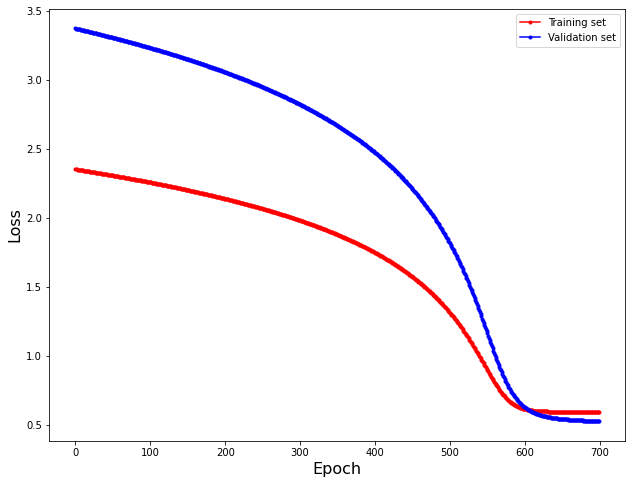

Best params at: 699


In [76]:
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2)

ax = fig.add_subplot(1, 1, 1)

ax.plot([i for i in range(len(loss_history))], loss_history, 'o-', ms=3, lw=1.5, color='red')
ax.plot([i for i in range(len(loss_val_history))], loss_val_history, 'o-', ms=3, lw=1.5, color='blue')
ax.legend(['Training set', 'Validation set'])
ax.set_xlabel('Epoch', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)

plt.show()

print('Best params at:', best_iter)

#### 6. What’s the final accuracy on training, validation, and testing dataset using your algorithm with ‘MSE’ as loss function.

a. Training data

In [77]:
y_predict, b, w1, w2, w3, w4, best_iter, loss_history, loss_val_history = mse_logistic_regression(X_train, y_train, MAX_ITER, LEARNING_RATE, X_train)

In [78]:
accuracy_score(y_train, y_predict)

0.675

b. Validation data

In [79]:
y_predict, b, w1, w2, w3, w4, best_iter, loss_history, loss_val_history = mse_logistic_regression(X_train, y_train, MAX_ITER, LEARNING_RATE, X_val)

In [80]:
accuracy_score(y_val, y_predict)

0.5333333333333333

c. Testing data

In [81]:
y_predict, b, w1, w2, w3, w4, best_iter, loss_history, loss_val_history = mse_logistic_regression(X_train, y_train, MAX_ITER, LEARNING_RATE, X_test)

In [82]:
accuracy_score(y_test, y_predict)

0.7333333333333333

1. 'MSE' learning is much slower than 'Cross-Entropy'.
2. 'Cross-Entropy' converges at 19th epoch, but 'MSE' converges at 699th epoch.
3. Accuracy is much lower when using 'MSE' as loss function than using 'Cross-Entropy'.